In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

In [3]:
weather_data = pd.read_csv('DeBilt1970.csv')

In [4]:
weather_data.loc[weather_data['Date'] == '2000-01-01 01:00:00']

,Date,T,T10N,TD,FH,FF,FX
252011,2000-01-01 01:00:00,50,NaN,45,30,30,50.0


In [5]:
weather_data.loc[weather_data['Date'] == '2018-12-31 23:00:00']

,Date,T,T10N,TD,FH,FF,FX
411630,2018-12-31 23:00:00,81,76.0,64,30,30,70.0


In [6]:
weather_train = weather_data.iloc[252010:411629,1:2].values #1:2 doesnt select column 2 but makes it a 2D array!
weather_test = weather_data.iloc[411630: ,1].values

In [7]:
weather_total=weather_data.iloc[:,1:2].values

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(weather_train)

In [9]:
training_set_scaled

array([[0.43093923],
       [0.43830571],
       [0.44198895],
       ...,
       [0.50092081],
       [0.49355433],
       [0.48802947]])

In [9]:
X_train = []
y_train = []
for i in range(200, 1258):
    X_train.append(training_set_scaled[i-200:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train = []
y_train = []
r = list(range(240, len(training_set_scaled)))
np.random.shuffle(r)
for i in r:
    X_train.append(training_set_scaled[i-240:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [13]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,dropout =0.2, return_sequences = True,  input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,dropout =0.2, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, dropout =0.2,return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50dropout =0.2,))
#regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
regressor.fit(X_train, y_train, epochs = 5, batch_size = 128)

Epoch 1/5
1246/1246 [==============================] - 51s 41ms/step - loss: 0.0040
Epoch 2/5
 147/1246 [==>...........................] - ETA: 44s - loss: 0.0024

KeyboardInterrupt: 

In [17]:
inputs = weather_total[len(weather_data.iloc[:,1:2].values) - len(weather_test) - 200:]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(240, 13286):
    X_test.append(inputs[i-240:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_weather_temp= regressor.predict(X_test)
#predicted_weather_temp = sc.inverse_transform(predicted_weather_temp)

In [16]:
X_test.shape

(13086, 200, 1)

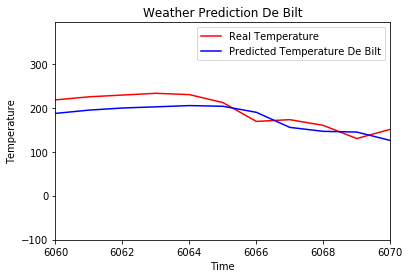

In [19]:
# Visualising the results
plt.plot(weather_test, color = 'red', label = 'Real Temperature')
plt.plot(predicted_weather_temp,color = 'blue', label = 'Predicted Temperature De Bilt')
x1,x2,y1,y2 = plt.axis()
plt.axis((6060, 6070,y1,y2))
plt.title('Weather Prediction De Bilt')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [18]:
predicted_weather_temp.shape

(13046, 1)

In [2]:
weather_data_daily = pd.read_csv('knmi.csv')

In [3]:
weather_data_daily.columns

Index([' STN', 'YYYYMMDD', 'DDVEC', 'FHVEC', '   FG', '  FHX', ' FHXH',
       '  FHN', ' FHNH', '  FXX', ' FXXH', '   TG', '   TN', '  TNH', '   TX',
       '  TXH', ' T10N', 'T10NH', '   SQ', '   SP', '    Q', '   DR', '   RH',
       '  RHX', ' RHXH', ' EV24', '   PG', '   PX', '  PXH', '   PN', '  PNH',
       '  VVN', ' VVNH', '  VVX', ' VVXH', '   NG', '   UG', '   UX', '  UXH',
       '   UN', '  UNH'],
      dtype='object')

In [4]:
weather_data_daily.loc[weather_data_daily['YYYYMMDD'] == 20190101]

,STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVN,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH
6940,260,20190101,298,36,43,50,6,30,1,140,...,36,1,75,19,7,77,97,10,58,21


In [5]:
weather_train_daily = weather_data_daily.iloc[:6939,11:12].values #11:12 doesnt select column 12 but makes it a 2D array!
weather_test_daily = weather_data_daily.iloc[6940: ,11:12].values

In [6]:
weather_daily_total=weather_data_daily.iloc[:,11:12].values

In [7]:
weather_data_daily.shape

(7487, 41)

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_daily_scaled = sc.fit_transform(weather_train_daily)

In [9]:
X_train = []
y_train = []
for i in range(60, len(training_daily_scaled)):
    X_train.append(training_daily_scaled[i-60:i, 0])
    y_train.append(training_daily_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True,  input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [13]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
430/430 [==============================] - 4s 9ms/step - loss: 0.0139
Epoch 2/100
430/430 [==============================] - 4s 8ms/step - loss: 0.0092
Epoch 3/100
430/430 [==============================] - 4s 8ms/step - loss: 0.0078
Epoch 4/100
430/430 [==============================] - 4s 9ms/step - loss: 0.0064
Epoch 5/100
430/430 [==============================] - 4s 8ms/step - loss: 0.0051
Epoch 6/100
430/430 [==============================] - 4s 9ms/step - loss: 0.0042
Epoch 7/100
430/430 [==============================] - 4s 9ms/step - loss: 0.0037
Epoch 8/100
430/430 [==============================] - 4s 9ms/step - loss: 0.0035
Epoch 9/100
430/430 [==============================] - 4s 10ms/step - loss: 0.0033
Epoch 10/100
430/430 [==============================] - 4s 9ms/step - loss: 0.0032
Epoch 11/100
430/430 [==============================] - 4s 9ms/step - loss: 0.0031
Epoch 12/100
430/430 [==============================] - 4s 9ms/step - loss: 0.0030
Epoch 13/100

In [14]:
inputs = weather_daily_total[len(weather_data_daily.iloc[:,1:2].values) - len(weather_test_daily) - 60:]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_weather_temp= regressor.predict(X_test)
predicted_weather_temp = sc.inverse_transform(predicted_weather_temp)

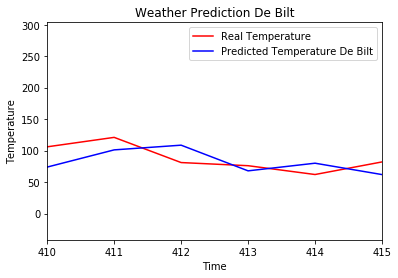

In [15]:
# Visualising the results
plt.plot(weather_test_daily, color = 'red', label = 'Real Temperature')
plt.plot(predicted_weather_temp,color = 'blue', label = 'Predicted Temperature De Bilt')
x1,x2,y1,y2 = plt.axis()
plt.axis((410, 415,y1,y2))
plt.title('Weather Prediction De Bilt')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# EXTRA BS|

In [5]:
weather_data = pd.read_csv('DeBilt1970.csv')

In [31]:
weather_train = weather_data.iloc[168015:350000,1:2].values #1:2 doesnt select column 2 but makes it a 2D array!
weather_valid = weather_data.iloc[350000:411630,1:2].values
weather_test = weather_data.iloc[411630: ,1:2].values
weather_total = weather_data.iloc[100000:, 1:2].reset_index()

In [32]:
weather_total

,index,T
0,100000,93
1,100001,99
2,100002,103
3,100003,105
4,100004,105
...,...,...
324851,424851,167
324852,424852,171
324853,424853,166
324854,424854,160


In [33]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
weather_total_scaled = sc.fit_transform(weather_total)


In [34]:
weather_total_scaled[159600:159628,0]

array([0.49129612, 0.4912992 , 0.49130227, 0.49130535, 0.49130843,
       0.49131151, 0.49131459, 0.49131766, 0.49132074, 0.49132382,
       0.4913269 , 0.49132998, 0.49133306, 0.49133613, 0.49133921,
       0.49134229, 0.49134537, 0.49134845, 0.49135153, 0.4913546 ,
       0.49135768, 0.49136076, 0.49136384, 0.49136692, 0.49137   ,
       0.49137307, 0.49137615, 0.49137923])

In [35]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
        i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),
                            lookback // step,
                            data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
    yield samples, targets

In [36]:
lookback = 1440
step = 1
delay = 144
batch_size = 128

In [37]:
train_gen = generator(weather_total_scaled,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)

In [38]:
val_gen = generator(weather_total_scaled,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=270000,
                    step=step,
                    batch_size=batch_size)

In [39]:
test_gen = generator(weather_total_scaled,
                     lookback=lookback,
                     delay=delay,
                     min_index=270000,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

In [40]:
val_steps = (300000 - 200001 - lookback)
test_steps = (len(weather_total_scaled) - 300001 - lookback)

In [49]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [53]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True,  input_shape = (None, weather_total.shape[-1])))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'RMSProp', loss = 'mae', metrics=['acc'])


In [54]:
history = regressor.fit(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

StopIteration: 

In [55]:
train_gen

<generator object generator at 0x7f80234a93d0>

In [41]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop


model = Sequential()
model.add(layers.GRU(32,
                    dropout=0.2,
                    recurrent_dropout=0.2,
                    input_shape=(None, weather_total.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')


history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()